## <ins>**Linear Model Explorations**</ins>
### **Objectives:**
+ Play with the linearity of the regression model.
+ See how it reacts to various data settings.

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

Text(0.5, 1.0, 'Original Underlying Function')

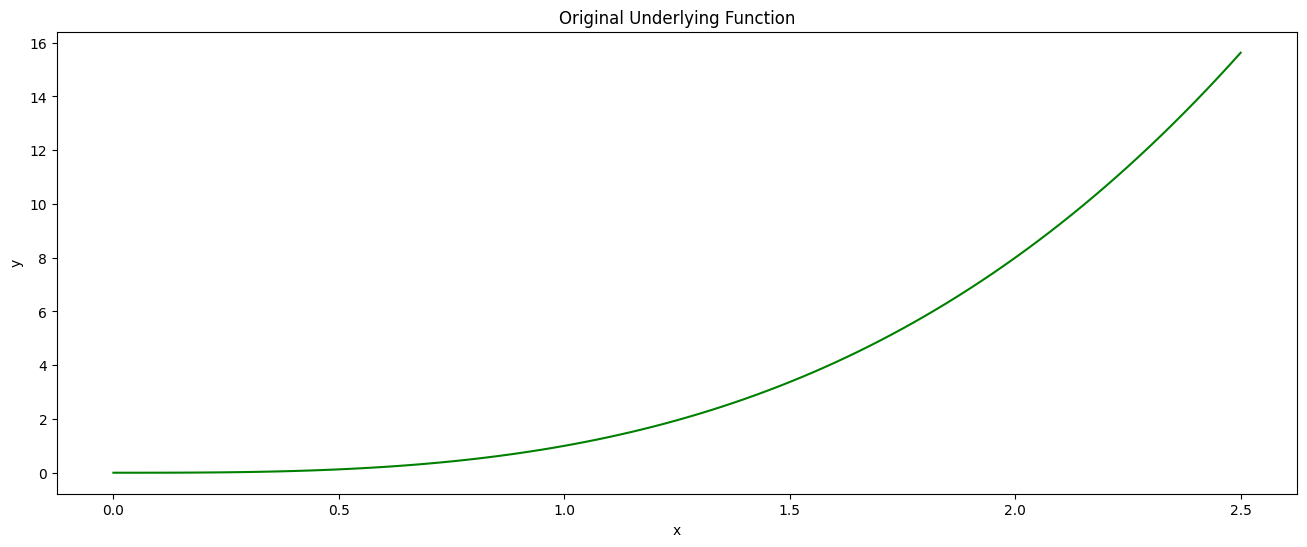

In [43]:
#Generate sample data from a known function.

x = np.arange(0.0, 2.51, 0.025)
y = np.power(x, 3)

#Plot the values
fig, ax = plt.subplots(figsize=(16,6))
ax.plot(x, y, c='g')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title("Original Underlying Function")

Text(0.5, 1.0, 'Dataset that we can observe')

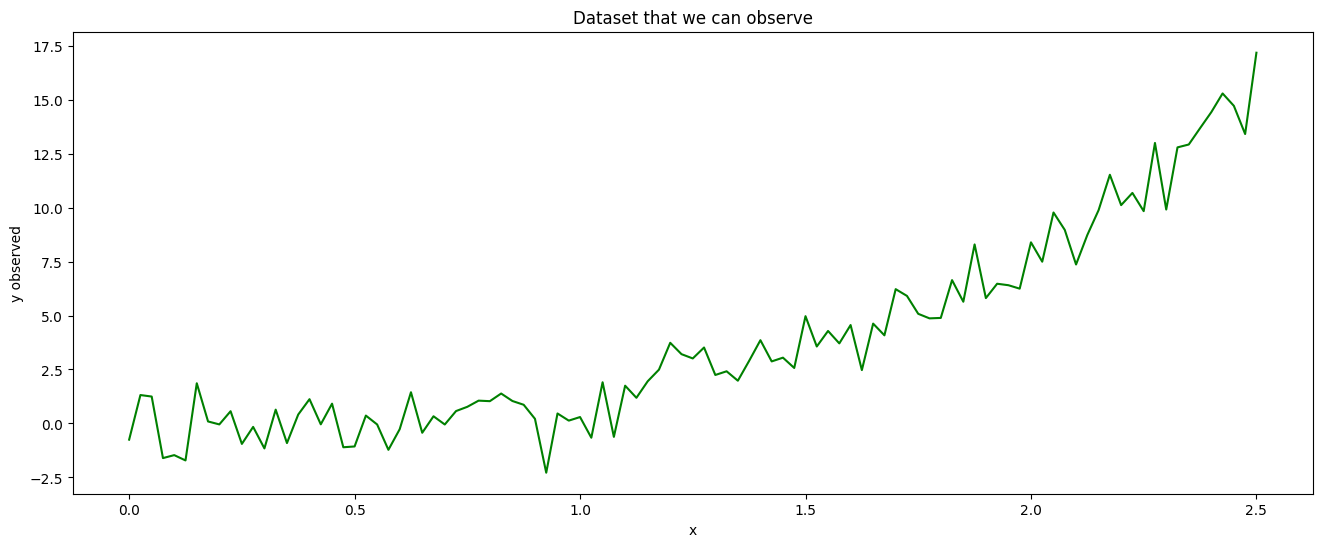

In [44]:
#Noisy Data samples that we can observe
np.random.seed(44)
y_observed = y + np.random.standard_normal(size=y.size)

#Plot the values
fig, ax = plt.subplots(figsize=(16,6))
ax.plot(x, y_observed, c='g')
ax.set_xlabel('x')
ax.set_ylabel('y observed')
ax.set_title("Dataset that we can observe")


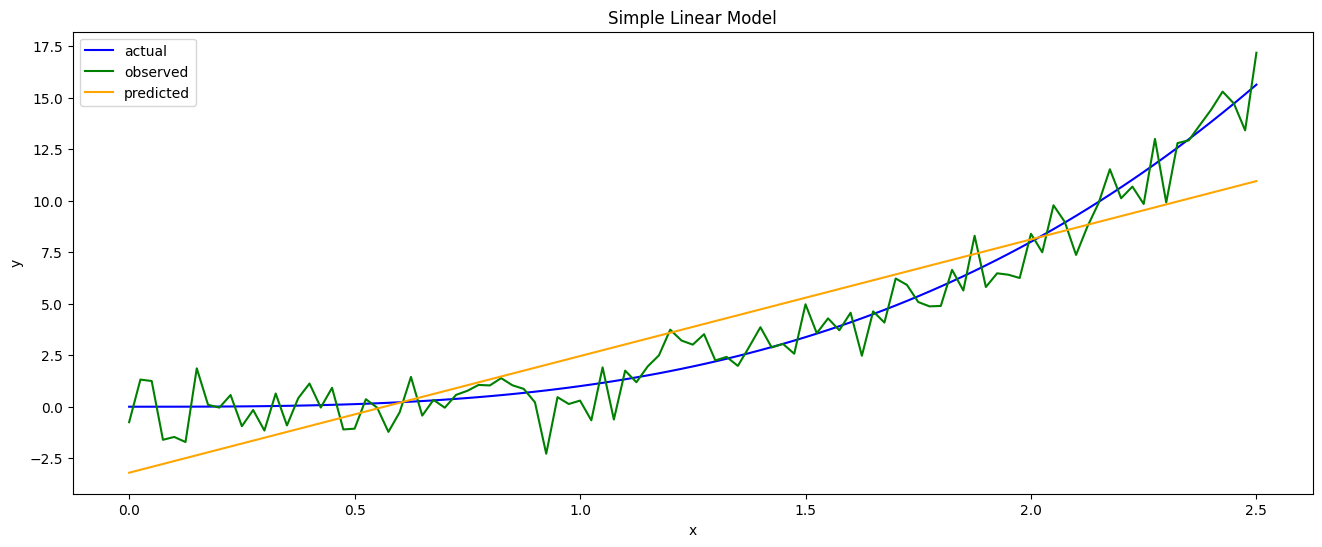

In [45]:
#How can we find the underlying function ?
#If we can assume that the residuals are gaussian and that the relationship between-
#dependent and parameters can be linear, then a linear model can be used.
x = x.reshape(-1, 1)
y_observed = y_observed.reshape(-1, 1)

lin_reg = LinearRegression()
lin_reg.fit(x, y_observed)
y_pred = lin_reg.predict(x)

#Plot the values
fig, ax = plt.subplots(figsize=(16,6))
ax.plot(x, y, c='b', label="actual")
ax.plot(x, y_observed, c='g', label="observed")
ax.plot(x, y_pred, color='orange', label="predicted")
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title("Simple Linear Model")
ax.legend()


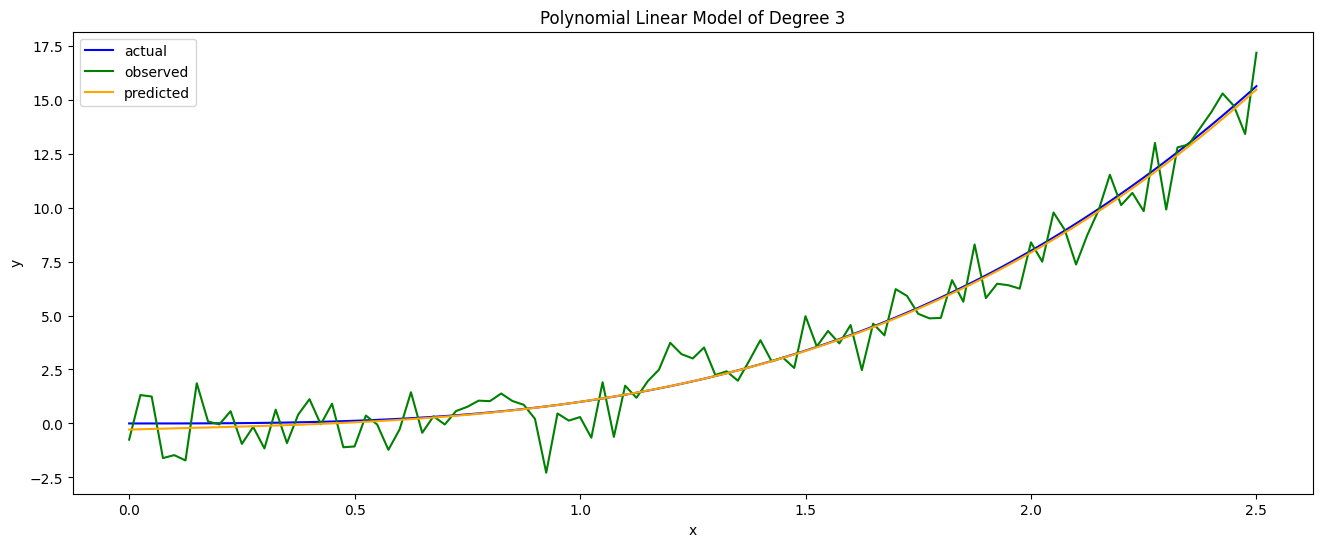

In [51]:
#What happens when we use polynimal linear regression of various degrees.

x = x.reshape(-1, 1)
y_observed = y_observed.reshape(-1, 1)

degree = 3
poly_features = PolynomialFeatures(degree)
x_poly = poly_features.fit_transform(x)

lin_reg = LinearRegression()
lin_reg.fit(x_poly, y_observed)
y_pred = lin_reg.predict(x_poly)

#Plot the values
fig, ax = plt.subplots(figsize=(16,6))
ax.plot(x, y, c='b', label="actual")
ax.plot(x, y_observed, c='g', label="observed")
ax.plot(x, y_pred, color='orange', label="predicted")
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title(f"Polynomial Linear Model of Degree {degree}")
ax.legend()

#### Observations
+ As the degree of the polynomial regression increases, we try to fit more and more complex models to the observed data.
+ This leads to heavy overfitting of the data to the random noise that is present in the observation rather than to the actual data. 
+ If the underlying data is also generated by a complex function, then we can afford to do higher degree polynomial regressions without risking overfitting.
+ Overfitting also depends on the how much Signal-to-Noise (SNR) ratio is present in the observations.
+ Larger the SNR, polynomial fits are not much infulenced by the noise and doesn't overfit much.  